In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [30]:
df = pd.read_csv('AAPL_data.csv')
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [31]:
df = df.values

open_value = df[:,1]
high_value = df[:,2]
low_value = df[:,3]
close_value = df[:,4]






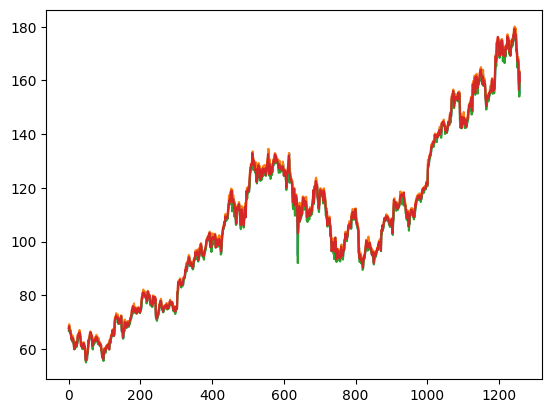

In [32]:
plt.plot(open_value)
plt.plot(high_value)
plt.plot(low_value)
plt.plot(close_value)
plt.show()

In [34]:
open_value = open_value.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_open_value = scaler.fit_transform(open_value)

print(open_value[:5].T)
print(scaled_open_value[:5].T)

[[67.7142 68.0714 68.5014 66.7442 66.3599]]
[[0.09915624 0.10203815 0.10550741 0.09133024 0.08822969]]


In [36]:
data = []
target = []

window_size = 50

for i in range(0,len(scaled_open_value)-window_size):
    data.append(scaled_open_value[i:i+window_size])
    target.append(scaled_open_value[i+window_size])

In [37]:

data_np = np.array(data)
target_np = np.array(target)

print(data_np.shape)
print(target_np.shape)

(1209, 50, 1)
(1209, 1)


In [45]:
np.save('data',data)
np.save('target',target)

In [50]:
data = np.load('data.npy')
target = np.load('target.npy')

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data,target,test_size=0.2)

print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(967, 50, 1)
(967, 1)
(242, 50, 1)
(242, 1)


In [57]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(optimizer='adam',loss='mean_squared_error')










e:\Ai\Deep_Learning\Stockmarket_prediction\Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,065 (1015.88 KB)

 Trainable params: 260,065 (1015.88 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(train_data,train_target,epochs=100,validation_data=(test_data,test_target))

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - loss: 0.0419 - val_loss: 0.0059
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0060 - val_loss: 0.0025
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 

In [60]:
from sklearn.metrics import mean_squared_error,r2_score

prediction = model.predict(test_data)

mse = mean_squared_error(test_target,prediction)
r2 = r2_score(test_target,prediction)

print(mse)
print(r2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
0.000611868132673554
0.988845309375209


In [64]:
model.save("aapl_lstm.h5")   # or .keras
print("model saved")


model saved


In [65]:
import joblib

joblib.dump(scaler, "scaler.pkl")

# save window size in a simple txt
with open("window_size.txt", "w") as f:
    f.write(str(window_size))

print("scaler and window size saved")


scaler and window size saved
